In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"
import os
os.listdir('../derivatives/single_trials/sub-104/')

['sub-104_task-sharedreward_run-02_singletrial-Act.nii.gz',
 'sub-104_task-ultimatum_run-02_singletrial-Act.nii.gz',
 'sub-104_task-trust_run-04_singletrial-Act.nii.gz',
 'sub-104_task-ultimatum_run-01_singletrial-Act.nii.gz',
 'sub-104_task-trust_run-05_singletrial-Act.nii.gz',
 'sub-104_task-trust_run-02_singletrial-Act.nii.gz',
 'sub-104_task-trust_run-01_singletrial-Act.nii.gz',
 'sub-104_task-trust_run-03_singletrial-Act.nii.gz',
 'sub-104_task-sharedreward_run-01_singletrial-Act.nii.gz']

In [4]:
tsnr_dir='../derivatives/tsnr/'
tsnr_imgs=[tsnr_dir+img for img in os.listdir(tsnr_dir)]
data=[]
for img in tsnr_imgs:
    sub='sub-'+re.search('sub-(.*)_task',img).group(1)
    task=re.search('task-(.*)_r',img).group(1)
    data.append([sub,task,img])
df=pd.DataFrame(data=data, columns=['sub','task','file'])
df.head()

,sub,task,file
0,sub-152,sharedreward,../derivatives/tsnr/sub-152_task-sharedreward_...
1,sub-113,trust,../derivatives/tsnr/sub-113_task-trust_run-5_t...
2,sub-151,sharedreward,../derivatives/tsnr/sub-151_task-sharedreward_...
3,sub-116,sharedreward,../derivatives/tsnr/sub-116_task-sharedreward_...
4,sub-142,ultimatum,../derivatives/tsnr/sub-142_task-ultimatum_run...


In [5]:
import nilearn.plotting as niplt
from nilearn.image import mean_img, concat_imgs

In [6]:
os.listdir('../figures/')

['SR_TSNR.svg',
 'mean-z_task-sharedreward.svg',
 'mean-z_task-ultimatum.svg',
 'Trust_TSNR.svg',
 'mean-z_task-trust.svg',
 'Ult_TSNR.svg']

/opt/anaconda3/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


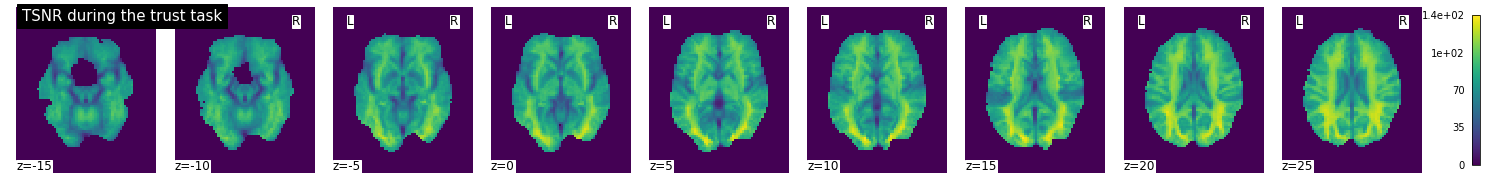

In [8]:
TSNR_trust=mean_img(df[df['task']=='trust']['file'].to_list())
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25) ,display_mode='z',title='TSNR during the trust task',colorbar=True)
plt.show()
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25),output_file='../figures/Trust_TSNR.svg'
               ,display_mode='z',title='TSNR during the trust task',colorbar=True)

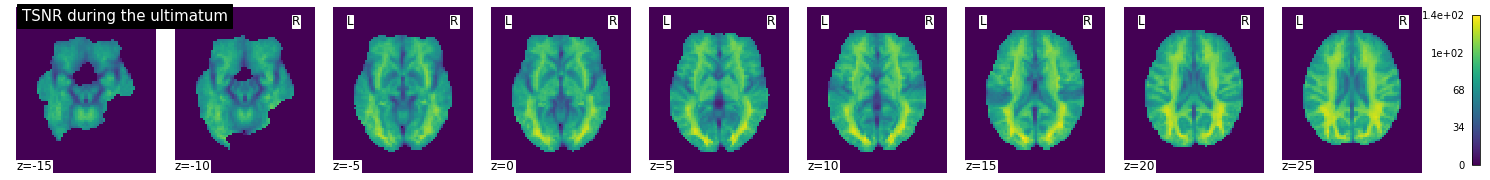

In [9]:
TSNR_trust=mean_img(df[df['task']=='ultimatum']['file'].to_list())
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25) ,display_mode='z',title='TSNR during the ultimatum',colorbar=True)
plt.show()
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25),output_file='../figures/Ult_TSNR.svg'
               ,display_mode='z',title='TSNR during the trust task',colorbar=True)


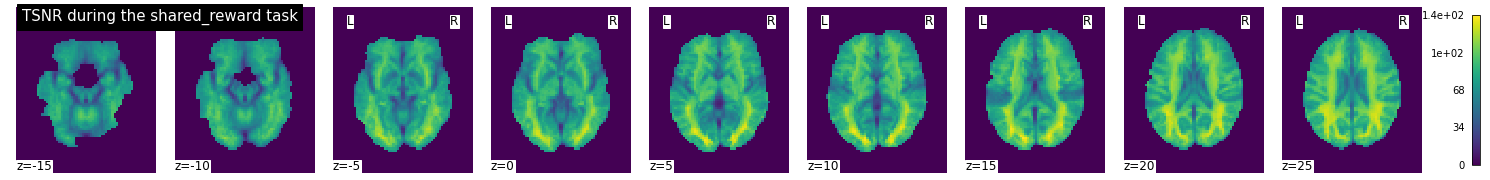

In [10]:
TSNR_trust=mean_img(df[df['task']=='sharedreward']['file'].to_list())
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25) ,display_mode='z',title='TSNR during the shared_reward task',colorbar=True)
plt.show()
niplt.plot_img(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25),output_file='../figures/SR_TSNR.svg'
               ,display_mode='z',title='TSNR during the trust task',colorbar=True)

In [11]:
from natsort import natsorted
import nibabel as nib
fsldir='../derivatives/fsl/'
sub_list=[sub for sub in os.listdir(fsldir) if sub.startswith('sub')]
for sub in sub_list:
    folders=[ds for ds in os.listdir(fsldir+sub) if ds.startswith('LSS-images_')]
    #print(folders)
    for folder in folders:
        d="%s%s/%s/"%(fsldir,sub,folder)
        task=re.search('task-(.*)_model',d).group(1)
        run=re.search('run-(.*)/',d).group(1)
        zimages=natsorted([d+f for f in os.listdir(d) if f.startswith('zstat_trial')])
        #print(natsorted(zimages))
        if any(zimages):
            print(len(zimages))
            X=concat_imgs(zimages)
            print(d)
            save_name='../derivatives/single_trials/%s/'%(sub)
            if not os.path.isdir(save_name):
                os.mkdir(save_name)
            save_name=save_name+'%s_task-%s_run-%s_singletrial-Act.nii.gz'%(sub,task,run)
            nib.save(X,save_name)

72
../derivatives/fsl/sub-135/LSS-images_task-ultimatum_model-01_type-act_run-01/
26
../derivatives/fsl/sub-135/LSS-images_task-trust_model-01_type-act_run-04/
72
../derivatives/fsl/sub-135/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-135/LSS-images_task-sharedreward_model-01_type-act_run-02/
26
../derivatives/fsl/sub-135/LSS-images_task-trust_model-01_type-act_run-01/
24
../derivatives/fsl/sub-135/LSS-images_task-trust_model-01_type-act_run-03/
24
../derivatives/fsl/sub-135/LSS-images_task-trust_model-01_type-act_run-05/
72
../derivatives/fsl/sub-135/LSS-images_task-sharedreward_model-01_type-act_run-01/
25
../derivatives/fsl/sub-135/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-158/LSS-images_task-ultimatum_model-01_type-act_run-01/
27
../derivatives/fsl/sub-158/LSS-images_task-trust_model-01_type-act_run-04/
72
../derivatives/fsl/sub-158/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-158/LSS-

72
../derivatives/fsl/sub-134/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-134/LSS-images_task-sharedreward_model-01_type-act_run-02/
35
../derivatives/fsl/sub-134/LSS-images_task-trust_model-01_type-act_run-01/
32
../derivatives/fsl/sub-134/LSS-images_task-trust_model-01_type-act_run-03/
72
../derivatives/fsl/sub-134/LSS-images_task-sharedreward_model-01_type-act_run-01/
33
../derivatives/fsl/sub-134/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-140/LSS-images_task-ultimatum_model-01_type-act_run-01/
23
../derivatives/fsl/sub-140/LSS-images_task-trust_model-01_type-act_run-04/
72
../derivatives/fsl/sub-140/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-140/LSS-images_task-sharedreward_model-01_type-act_run-02/
29
../derivatives/fsl/sub-140/LSS-images_task-trust_model-01_type-act_run-01/
24
../derivatives/fsl/sub-140/LSS-images_task-trust_model-01_type-act_run-03/
31
../derivatives/fsl/sub-140/L

29
../derivatives/fsl/sub-157/LSS-images_task-trust_model-01_type-act_run-05/
72
../derivatives/fsl/sub-157/LSS-images_task-sharedreward_model-01_type-act_run-01/
27
../derivatives/fsl/sub-157/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-111/LSS-images_task-ultimatum_model-01_type-act_run-01/
36
../derivatives/fsl/sub-111/LSS-images_task-trust_model-01_type-act_run-04/
72
../derivatives/fsl/sub-111/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-111/LSS-images_task-sharedreward_model-01_type-act_run-02/
15
../derivatives/fsl/sub-111/LSS-images_task-trust_model-01_type-act_run-01/
36
../derivatives/fsl/sub-111/LSS-images_task-trust_model-01_type-act_run-03/
35
../derivatives/fsl/sub-111/LSS-images_task-trust_model-01_type-act_run-05/
72
../derivatives/fsl/sub-111/LSS-images_task-sharedreward_model-01_type-act_run-01/
25
../derivatives/fsl/sub-111/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-128/LSS-i

35
../derivatives/fsl/sub-124/LSS-images_task-trust_model-01_type-act_run-01/
31
../derivatives/fsl/sub-124/LSS-images_task-trust_model-01_type-act_run-03/
31
../derivatives/fsl/sub-124/LSS-images_task-trust_model-01_type-act_run-05/
72
../derivatives/fsl/sub-124/LSS-images_task-sharedreward_model-01_type-act_run-01/
35
../derivatives/fsl/sub-124/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-126/LSS-images_task-ultimatum_model-01_type-act_run-01/
20
../derivatives/fsl/sub-126/LSS-images_task-trust_model-01_type-act_run-04/
72
../derivatives/fsl/sub-126/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-126/LSS-images_task-sharedreward_model-01_type-act_run-02/
27
../derivatives/fsl/sub-126/LSS-images_task-trust_model-01_type-act_run-01/
20
../derivatives/fsl/sub-126/LSS-images_task-trust_model-01_type-act_run-03/
25
../derivatives/fsl/sub-126/LSS-images_task-trust_model-01_type-act_run-05/
72
../derivatives/fsl/sub-126/LSS-images_t

72
../derivatives/fsl/sub-144/LSS-images_task-sharedreward_model-01_type-act_run-02/
24
../derivatives/fsl/sub-144/LSS-images_task-trust_model-01_type-act_run-01/
72
../derivatives/fsl/sub-144/LSS-images_task-sharedreward_model-01_type-act_run-01/
36
../derivatives/fsl/sub-144/LSS-images_task-trust_model-01_type-act_run-02/
72
../derivatives/fsl/sub-110/LSS-images_task-ultimatum_model-01_type-act_run-01/
72
../derivatives/fsl/sub-110/LSS-images_task-ultimatum_model-01_type-act_run-02/
72
../derivatives/fsl/sub-110/LSS-images_task-sharedreward_model-01_type-act_run-02/
29
../derivatives/fsl/sub-110/LSS-images_task-trust_model-01_type-act_run-01/
72
../derivatives/fsl/sub-110/LSS-images_task-sharedreward_model-01_type-act_run-01/
26
../derivatives/fsl/sub-110/LSS-images_task-trust_model-01_type-act_run-02/


In [12]:
root='../derivatives/fsl'
allfiles = [os.path.join(root,f) for root,dirs,files in os.walk(root) for f in files if "Total_4d.nii.gz" in f ]
data=[]
for f in allfiles:
    sub='sub-'+re.search('fsl/sub-(.*)/LSS',f).group(1)
    task=re.search('images_task-(.*)_model',f).group(1)
    data.append([sub,task,f])
df=pd.DataFrame(data=data,columns=['sub','task','image'])

In [13]:
from nilearn.image import math_img,binarize_img,threshold_img
for task in df.task.unique():
    TSNR_trust=mean_img(df[df['task']==task]['image'].to_list())
    
    f=niplt.plot_stat_map(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25) ,display_mode='z',
                   title='mean z for trials in %s task'%(task),colorbar=True,cmap='cold_hot',vmax=.3)
    plt.savefig("../figures/mean-z_task-%s.svg"%(task))
    plt.show()
    

/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 0D image. See http://nilearn.github.io/manipulating_images/input_output.html.

In [ ]:
from nilearn.image import math_img,binarize_img,threshold_img
for task in df.task.unique():
    #TSNR_trust=mean_img(df[df['task']==task]['image'].to_list())
    TSNR_trust=binarize_img(df[df['task']==task]['image'].to_list(),threshold=1.96)
    TSNR_trust=math_img('np.sum(img)', img=TSNR_trust)
    f=niplt.plot_stat_map(TSNR_trust,cut_coords=(-15,-10,-5,0,5,10,15,20,25) ,display_mode='z',
                   title='mean z for trials in %s task'%(task),colorbar=True,cmap='cold_hot',vmax=.3)
    plt.savefig("../figures/totalgr_196_task-%s.svg"%(task))
    plt.show()
    

In [74]:
df../figures/

SyntaxError: invalid syntax (<ipython-input-74-25a8302e4c14>, line 1)